---
<a name="top"></a>
# External Modules & Reference Semantics
## Overview
### [External Modules](#external_modules)
* [General](#general)
  * [Namespace](#namespace)
  * [Importing Modules](#importingModules)
* [Math Module](#math)
* [Statistics & (Pseudo-)Random](#statistics)
* [Computing with Dates and Times](#datesAndTimes)
* [String Module](#string)
* [Machine Learning and Data Science modules](#ml)

### [Reference Semantics: Assignment & Comparison](#refSem)
* [General](#general-refSem)
* [Aliasing vs. Copy](#aliasingVsCopy)
* [Deep vs. Shallow Copy](#deepVsShallow)
* [Default Function Parameters](#defaultParameters)

---
<a name="external_modules"></a>
# External Modules

<a name="general"></a>
## [General](#top)

In the last chapters you have learned how to use built-in functions and how to implement your own functions in a notebook (as code fragments). 

In many cases it makes sense to bundle function definitions in so-called `modules`. 

These modules may not be part of the basic Python installation by default and therefore might need to be installed first and then imported into your code to make them visible.

Most modules are not part of the basic `Python` installation by default and therefore usually need to be installed first. This is done to keep the initial installation of `Python` small as not every developer needs every module ever written. Further, the list of available modules constantly increases. Therefore, if you want to use a specific module, you often have to install it yourself and import it into the code to make them visible in the current scope.


<a name="namespace" id="namespace"></a>
### [Namespace](#top)
In the last chapter you have already briefly read something about [namespaces](04_Functions.ipynb#namespace).
A namespace ensures that all names in that part of a program are unique and can therefore be used without conflicts.  

**A module also defines its own namespace**, which means that the name of a module must be uniquely identifiable. In this chapter, again, all names (variables and functions) must define their own namespace. <br>

By using namespaces, however, it is possible for two different modules to have the same names for functions (and global variables). Because the functions are located in different modules, they can be unambiguously assigned again. E.g. a module `math` might contain a function `log( )` (computing the logarithm) and another module (one we might create) such as `data_collector` might also define a function `log( )` (e.g. for logging events) which can be distinguished from the first one.

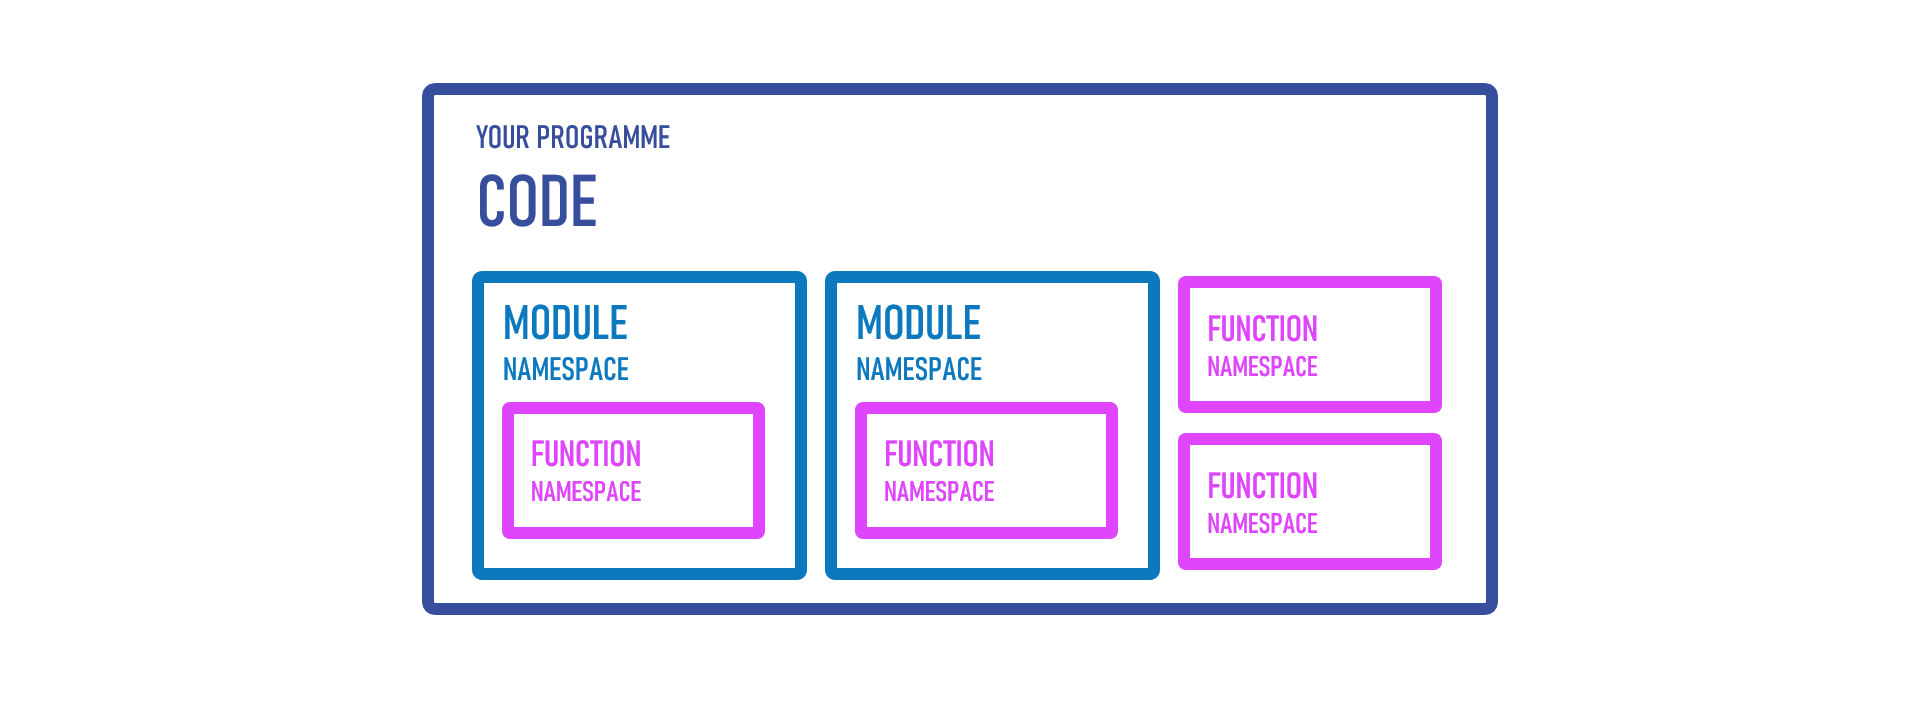

<a name="importingModules"></a>
### [Importing Modules](#top)
In order to use functions from a module, the module must be imported at the beginning of your programme. This is achieved by the command `import`. It actually does not import any code, but only makes the name of the module visible in the namespace of your code (the current module).

If several modules are imported that might use the same name for a function, they can be distinguished by the dot-notation: `math.log()` is not the same as `data_collector.log()`.

---
<a name="math"></a>
## [Math Module](#top)

The [math module](https://docs.python.org/3/library/math.html) is made visible by using `import math`. You can access the functions and variables of a module by qualifying their name with the module name (dot notation), e.g. `math.log()`.

In [ ]:
import math

In [ ]:
math.log(256,2) # the logarithm to base 2

In [ ]:
math.sqrt(25) 

If you do not want to call the math function fully qualified everytime, you can import specific names from a module. Of courses, then you cannot use the same name for your own function definitions anylonger.

In [ ]:
from math import log, sqrt  # you can explicitly import specific functions from a module
print('log(1024, 2) =', log(1024, 2))
print('sqrt(25) =', sqrt(25))

Now `log()` and `sqrt()` from `module math` are treated like names defined in the current module. All the other `math` functions can still be used fully qualified (since the module has been imported in a code cell above).

You might import all the constants and functions from the math module and use them without having to qualify:

```Python
from math import * 
```

We generally discourage this, as it violates the idea of namespaces, especially when using packages like NumPy and Pandas, which also define math functions (many with the same name). Instead, if you really need to use a lot of a package's functions, and its name is too long to qualify each use, you can import a module and rename it with an abbreviated name. There are conventions for short names like NumPy (np) and Pandas (pd) and many more of the practical packages. In our case of importing math:

In [ ]:
import math as m

In [ ]:
m.sqrt(625)

To overcome naming conflict, you can also rename imported functions:

In [ ]:
from math import log as mlog, sqrt as msqrt
mlog(1024, 2)

If we want to learn more about a module or a single function, we have to read a module's documentation (_doc_). Docs are usually published online and can be found be searching for _python module_name_. Alternatively we can use the built-in `help` function:

In [ ]:
# As we have imported the module above, it can be used in any code cell
help(math)

In [ ]:
help(math.log)

In [ ]:
math.log(100000, 10)

Besides functions, modules can also define own constants:

In [ ]:
math.cos( math.pi ) # cosine of the constant pi

If you ever need to "un-import" a module this is possible with the del statement:

In [ ]:
del math

In [ ]:
math.cos( math.pi ) # cosine of the constant pi

In our case, the module math is still known with the name m:

In [ ]:
m.cos( m.pi )

... and the name-imported functions as well:

In [ ]:
msqrt(25)

---
<a name="statistics"></a>
## [Statistics & (Pseudo-)Random](#top)

The [statistics module](https://docs.python.org/3/library/statistics.html) provides functions for calculating mathematical statistics of numerical data. Although we advise against it for ease of demonstration we import all of the package's functions: `from statistics import *`:

In [ ]:
from statistics import *
l = [-1, 0, 1, 2, 5, 6, 6, 6, 6]
print("mean: ", mean(l))
print("median: ", median(l))
print("mode: ", mode(l), ' is the most common value')
print("variance: ", variance(l))
print("pvariance: ", pvariance(l))

In [ ]:
help(pvariance)

In [ ]:
from fractions import Fraction as F
l = [F(-1, 2), F(0, 1), F(1, 2), F(1, 2), F(3, 4), F(5, 6)]
print("mean: ", mean(l))
print("median: ", median(l))
print("mode: ", mode(l), ' is the most common value')
print("variance: ", variance(l))
print("pvariance: ", pvariance(l))

Some other examples:

In [ ]:
from random import *
randint(1,10) # Return a random integer N such that a <= N <= b

As we imported everything from the `random` module but not the module itself, the next code cell with return an error as `random` is not known: <br>
**Error Message** `AttributeError: 'builtin_function_or_method' object has no attribute 'randint'`

In [ ]:
random.randint(1,10) #Return a random integer N such that a <= N <= b

The __builtin_function_or_method__ states that `random` is still known by Python. So let's use the `help` function to know what `random` is:

In [ ]:
help(random)

So `random` is a built-in function that creates a random number.

In the following, you see an example of using functions from two modules together. There might be exceptions when computing the mode. 

In [ ]:
for i in range(3):   # demo 3 times random list and statics
    randoms = []
    for j in range(20):
        randoms.append(randint(1,100))
    print(randoms)
    print("mean: ", mean(randoms))
    print("median: ", median(randoms))
    print("mode: ", mode(randoms))
    print('-'*60)

In [ ]:
help(mode)

---
<a id="datesAndTimes"></a>
## [Computing with Dates and Times](#top)

This is a good example for importing the [datetime](https://docs.python.org/3/library/datetime.html) module with a (shortened) name: `import datetime as dt`. This allows you to access the functionalities of datetime via **`dt`** instead of `datetime`:

In [ ]:
import datetime as dt # "dt" instead of datetime when we refer to the module
today = dt.date.today()
today.weekday() # Return the day of the week as an integer: Monday = 0 and Sunday = 6

This also means that the datetime module is **only** visible via `dt`, **not** via `datetime`. Therefore, we will receive an error when executing the following code cell. <br>
**Error Message** `NameError: name 'datetime' is not defined`

In [ ]:
today = datetime.date.today()

The `datetime` module allows us to work with dates and times. Below you find some example usages:

In [ ]:
print(today)
today.strftime("%A %d. %B %Y") # formatted output for many different types/data formats 

In [ ]:
Xmas = dt.date(2023, 12, 24 )
Xmas - today

In [ ]:
someday = today + dt.timedelta(42)
someday.strftime("%A %d. %B %Y")

<div class="learnmore">There are some more practical functions to work with dates, times and calenders: see <a href="https://docs.python.org/3.8/library/datetime.html?highlight=date#">https://docs.python.org/3.8/library/datetime.html?highlight=date#</a> and <a href="https://docs.python.org/3.8/library/calendar.html">https://docs.python.org/3.8/library/calendar.html</a>

---
<a name="string"></a>
## [String Module](#top)

In the [first chapter](01_intro.ipynb#string_functions_table) you have already been introduced to various built-in functions for the datatype `str`. In addition, there is also an extra [string module](https://docs.python.org/3/library/string.html) that contains even more functionalities. <br>
For example, you can display all upper case letters or all lower case letters in a list:


In [ ]:
import string
print(string.ascii_uppercase)
print(list(string.ascii_lowercase))

---
<a name="ml"></a>
## [Machine Learning and Data Science modules](#top)

We will now have a brief look at some modules which are heavily used in Machine Learning and Datascience. You will learn more about them in later lessons.

### NumPy

NumPy stands for numerical Python and is a programming library that introduces a new datastructure, the n-dimensional array. In addition to this data structure, NumPy also offers lots of very efficiently implemented functions for numerical calculations. For example, it can calculate the variance of a given data-set:

In [ ]:
import numpy as np

np.var([1,2,3,4,5,6,7,8,9,10])

You will learn more about NumPy in [lecture 9](09_Numpy.ipynb).

### Matplotlib

Matplotlib is used to visualize data. With it you can create lots of different plots including scatter plots, histograms, bar charts and much more: 

In [ ]:
import matplotlib.pyplot as plt

plt.scatter([1,2,3,4],[4,5,4,0])
plt.show()

You will learn more about Matplotlib in [lecture 10](10_Matplotlib.ipynb).

### Pandas

Pandas is a library for processing, analyzing and displaying data. In particular, it contains data structures and operators for accessing data, especially in a tabular format. It is built on top of NumPy and provides a very convenient way of working with real-life data.

You will learn more about Pandas in [lecture 8](08_Pandas.ipynb).

### SciKit-learn

SciKit-learn is a library that implements many different machine learning and datascience algorithms so that you can use them right away. It offers various classification-, regression- and clustering-algorithms including neural networks and support vector machines. We will not cover this library in one of our lectures, because this is a python and not a machine learning course. But you will use all of those in the more advanced AI modules.

---
<a id="summary"></a>
# External Modules: Summary
Within this section of the chapter you have been introduced to using external modules. This includes in particular:

* Python always comes with a large variety of modules, the "Python Standard Libary": https://docs.python.org/3/library/index.html
* More modules are available from installed modules. Within this Jupyter environment some modules are already pre-installed, which you could make visible by using `import module_name`. 
* Different visibility of modules and their functions:
  * `import ...`: use all the functions of that module fully qualified
  * `import ... as ..`: define a "short" name for the qualification
  * `from ... import ...`: import specific functions from a module to be used unqualified
  * `from ... import ... as ...`: rename functions when importing
* Various example of modules and some intreresting functionality
  * [Math Module](#math)
  * [Statistics & (Pseudo-)Random](#statistics)
  * [Computing with Dates and Times](#datesAndTimes)
  * [String Module](#string)
  * [Machine learning and Data Science modules](#ml)

<br>

> **Note:** 
When installing the Python package locally at your PC, you can install many additional packages. A first introduction how to install Python locally can be found in [CheatSheets/InstallingPythonLocally.ipynb](CheatSheets/InstallingPythonLocally.ipynb#installingExternalModules). <br>
You can also define your own modules if you want to implement a more complex programm. Nevertheless, this is not part of this course. If you would like to learn more about creating your own modules, you will find a lot of help on the internet, e.g. on [digitalocean](https://www.digitalocean.com/community/tutorials/how-to-write-modules-in-python-3) or on [linuxhint](https://linuxhint.com/create_python_modules/).

---
---
<a name="refSem"></a>
# Reference Semantics

<a name="general-refSem"></a>
## [General](#top)
Everything in Python is an **object**.

Objects (except the ones representing some of the native types) might need a fair amount of memory space. Objects of different types need different amounts of space. In order to keep memory management simple, Python implements __reference semantics__. 


So if a value is assigned to a variable, the object will be placed in the dynamic storage place (called the `heap`) and the variable will be assigned a reference (or pointer) to the allocated space.

If we set a variable to an _immutable_ native data type, it seems as if the variable gets directly assigned that value.

In [ ]:
x = 5
y = x
x = x + 1
s = "Immutable str object. "
t = s + "Thus, this creates a new string object"
print ('x =', x)
print ('y =', y, '(of course unchanged).')
print('s =', s, '(unchanged).')
print('t =', t)

If we set a new variable to an existing _mutable_ object (e.g. a list), this only sets a new reference to the same existing object, it does NOT create a new object. That means that if we change the referenced object, the referenced value of the other variable also changes, because it references the SAME (now changed) object.

> **Reminder:** 

|  | **`bool`** | **`int`** | **`float`** | **`str`** | **`list`** | **`tuple`** | **`set`** | **`frozenset`** | **`dictionary`** |
|----|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|
| Immutable | ✔ | ✔ | ✔ | ✔ | ❌ | ✔ | ❌ | ✔ | ❌ |
| Mutable | ❌ | ❌ | ❌ | ❌ | ✔ | ❌ | ✔ | ❌ | ✔ |


Below, we create a list as a mutable object and reference to it with another variable. If we then alter the second variable, the changes will apply on both pointers. Using the `id` function, we can see the identity of an object (the unique integer that identifies an object and remains constant during its lifetime).


In [ ]:
list_1 = ["a", "b", "c"]
list_2 = list_1 # both refence the SAME list object

list_2.pop(0) # delete first item 'a'

print(list_2) # as expected without 'a'
print(list_1) # list_1 references the SAME object (list)

print(id(list_1), '==', id(list_2))

# In contrast:
x = 5
y = x
print('x:', x, 'y:', y, 'and', id(x), '==', id(y))
x += 1
print('x:', x, 'y:', y, 'and', id(x), '!=', id(y))

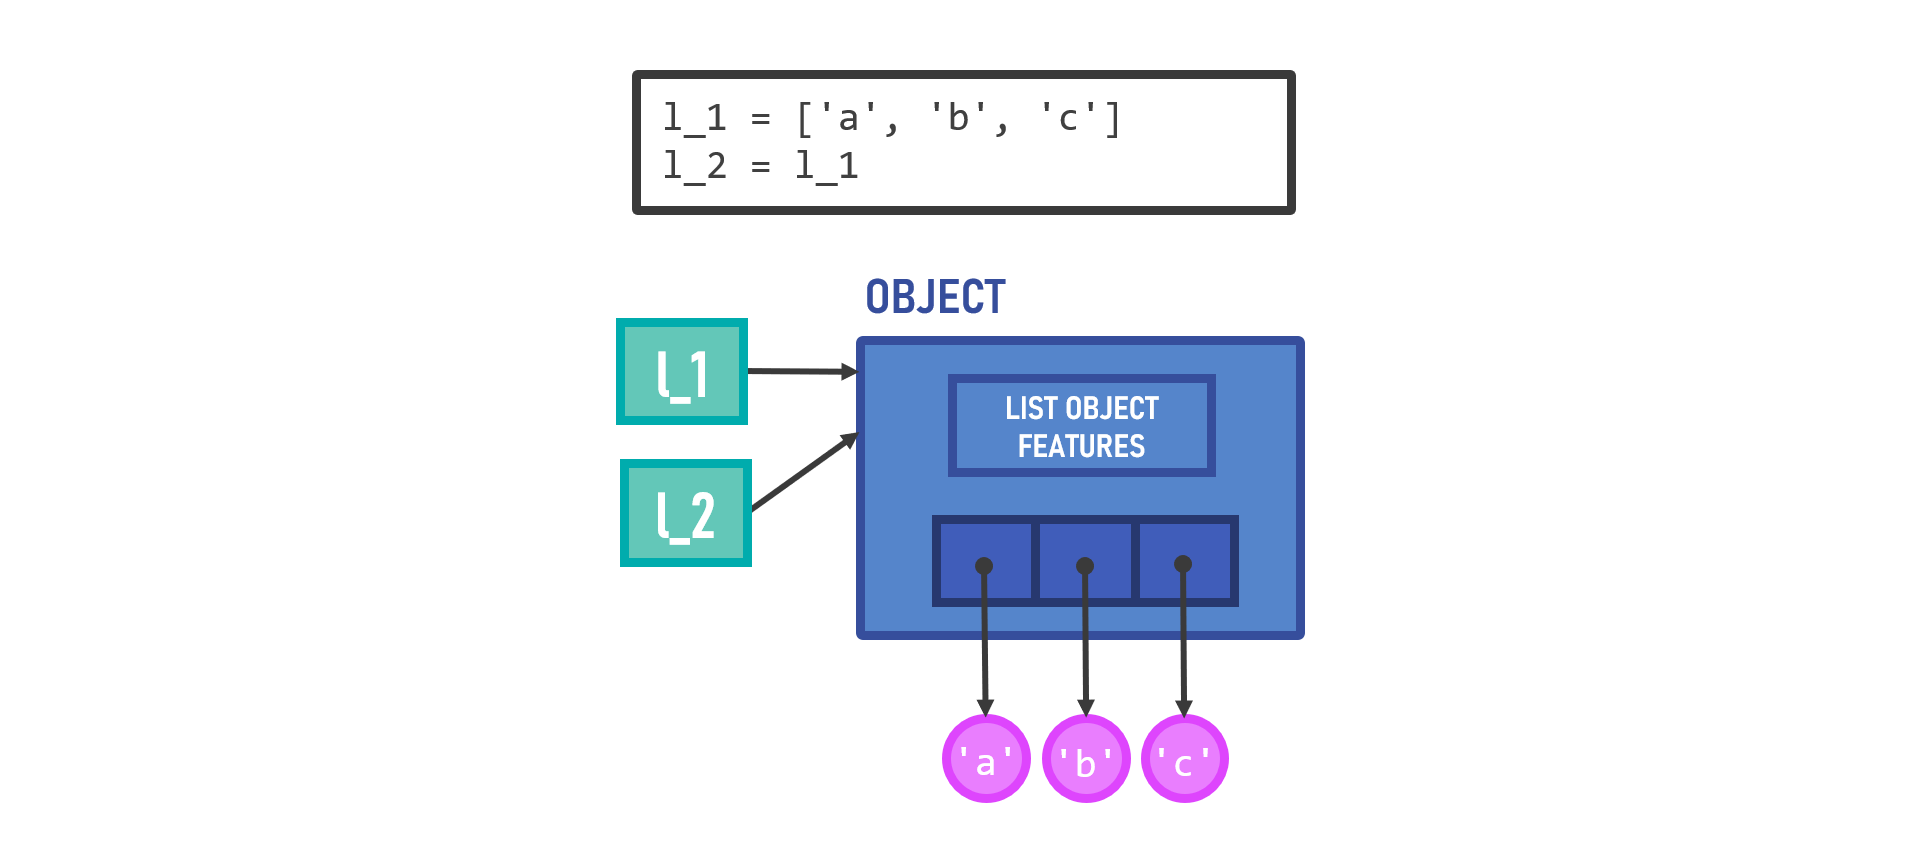

---
<a name="aliasingVsCopy"></a>
## [Aliasing vs. Copy](#top)

To avoid that behavior (called __aliasing__), we can create a (shallow) __copy__ of that object using the method `copy()`:

In [ ]:
list_1 = ["a", "b", "c"]
list_2 = list_1.copy()
# another way to achieve the same: slicing the complete list creates a copy of that list
list_3 = list_1[:]

list_2.pop(0)
list_3.append("d")

print('list_2 (copy no alias) after pop(0) =\n   ', list_2)
print('list_1 thus unchanged:\n   ', list_1)
print('list_3 is another (independent) copy:\n   ', list_3)

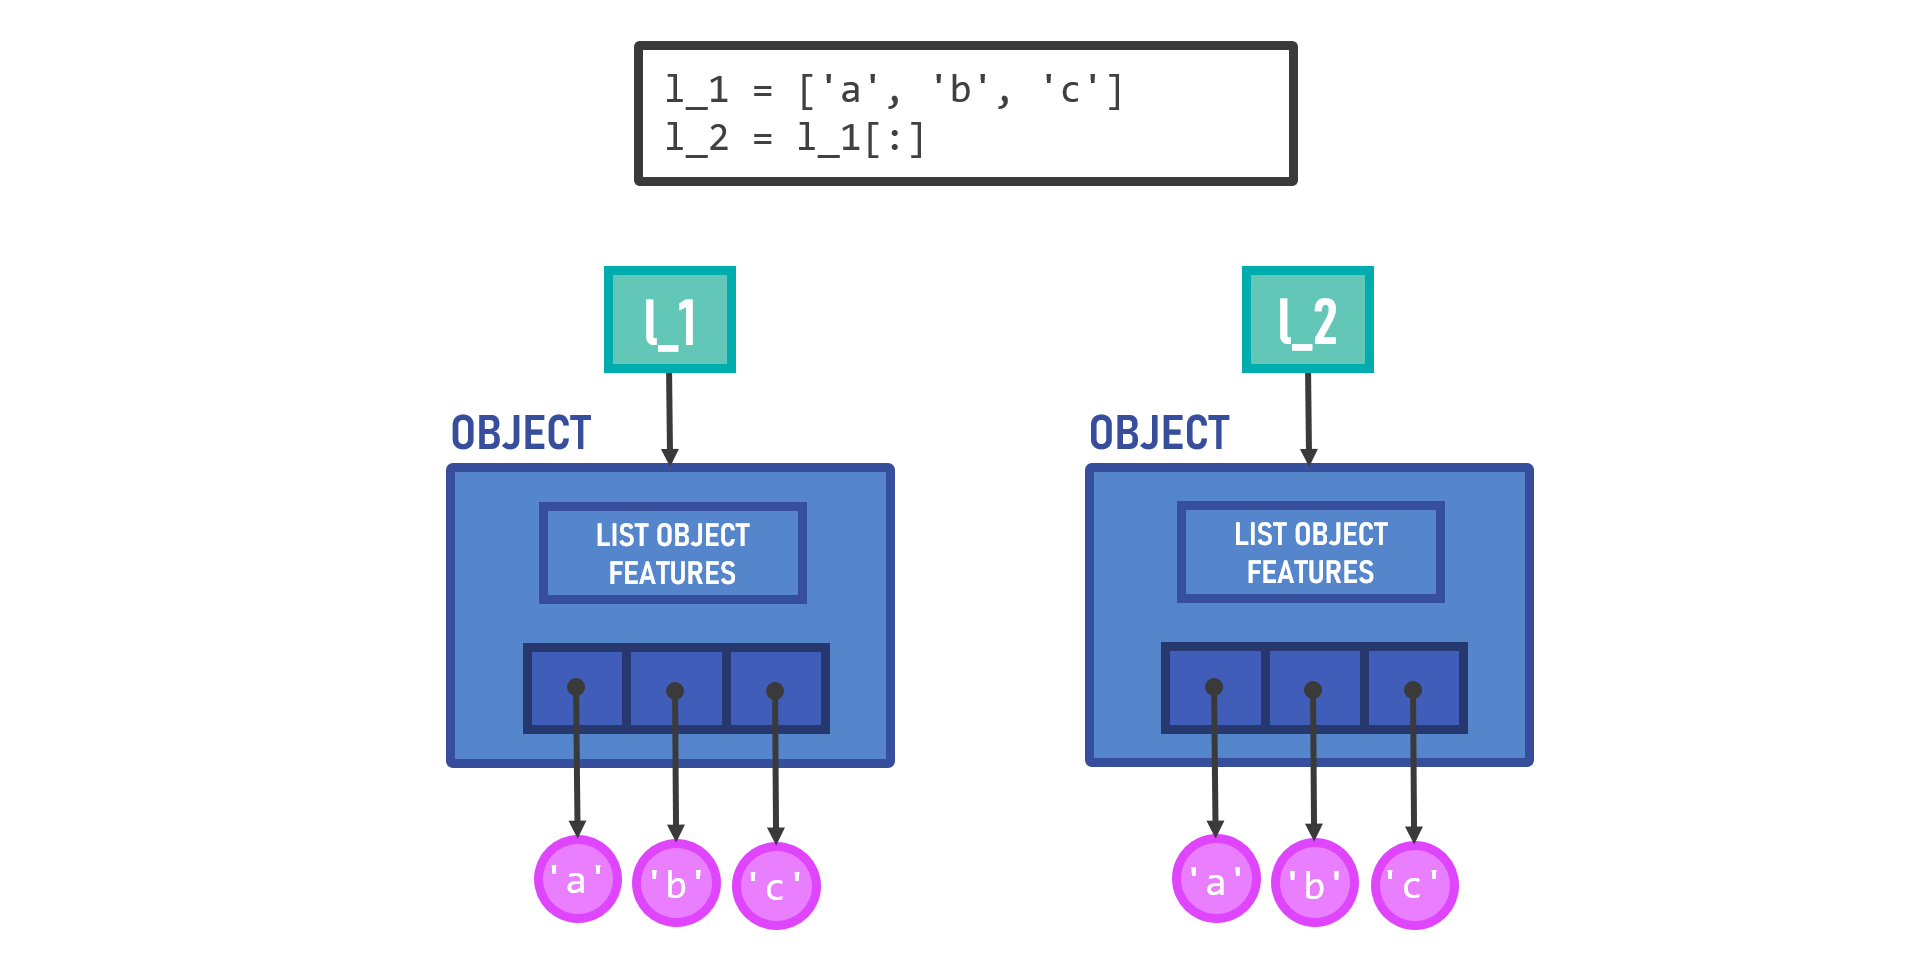

Assigning the same list __literally__ to different variables assigns two different `list` objects. So the lists are the same or equal concerning their content, but they are not the identical object. Thus, we have two different comparisons: does a variable reference the same identical object (alias) or do two different objects have the same values:

In [ ]:
list_1 = ["a", "b", "c"]
list_2 = ["a", "b", "c"] # another object than the one referenced by list_1 (it only contains the same items)
list_3 = list_1          # this is the same object as the one referenced by list_1 => aliasing

print('Object reference of l1:', id(list_1))
print('Object reference of l2:', id(list_2))
print('Object reference of l3:', id(list_3))

if list_1 == list_2:
    print( 'l1 and l2 objects have the same value')

if list_1 is list_2:
    print( 'l1 and l2 variables reference the identical object (alias)')
else:
    print( 'l1 and l2 variables reference different objects')

if list_1 == list_3:
    print( 'l1 and l3 objects have the same value')
    
if list_1 is list_3:
    print( 'l1 and l3 variables reference the identical object (alias)')
else:
    print( 'l1 and l3 variables reference different objects')
    
list_1.pop( 0 )
print('after deleting the first item in list_1:')
print('List1: ', list_1)
print('List2: ', list_2)
print('List3: ', list_3)

---
<a name="deepVsShallow"></a>
## [Deep vs. Shallow Copy](#top)
Now that we know the difference between aliasing and (shallow) copying, we have to consider the case that mutable objects like lists contain mutable objects as items (e.g. lists again). A _shallow copy_ only creates an object, containing the same (identical) items. Thus, these items still are shared (aliasing). If we want to copy a whole _object structure_, we need to __deep_copy__ the object:
> **Reminder:** In the [last chapter](05_ExternalModules.ipynb) you got to know external modules. `deepcopy()` is not included in the basic equipment, but is located in the `copy` module, which must first be imported.

In [ ]:
import copy # use functions of the package copy

LoL_1 = [[1, 2, 3], [4, 5], [6, 7, 8, 9]]
LoL_2 = LoL_1 # alias
LoL_3 = LoL_1.copy() # shallow copy
LoL_4 = copy.deepcopy(LoL_1) # genereic deepcopy of complete object structure => all the objects are copied

print("LoL_1:", LoL_1)
print("LoL_2:", LoL_2, "(alias of LoL_1)")
print("LoL_3:", LoL_3, "(shallow copy of LoL_1)")
print("LoL_4:", LoL_4, "(deep copy of LoL_1)")

# now change items within the list objects, which are items of the lists
LoL_2[1].append(42)
LoL_3.append([10, 11, 12])
LoL_4.pop(0)
LoL_4[1][0] = 666

print("After some changes within the inner lists")
print("LoL_1:", LoL_1)
print("LoL_2:", LoL_2)
print("LoL_3:", LoL_3)
print("LoL_4:", LoL_4)

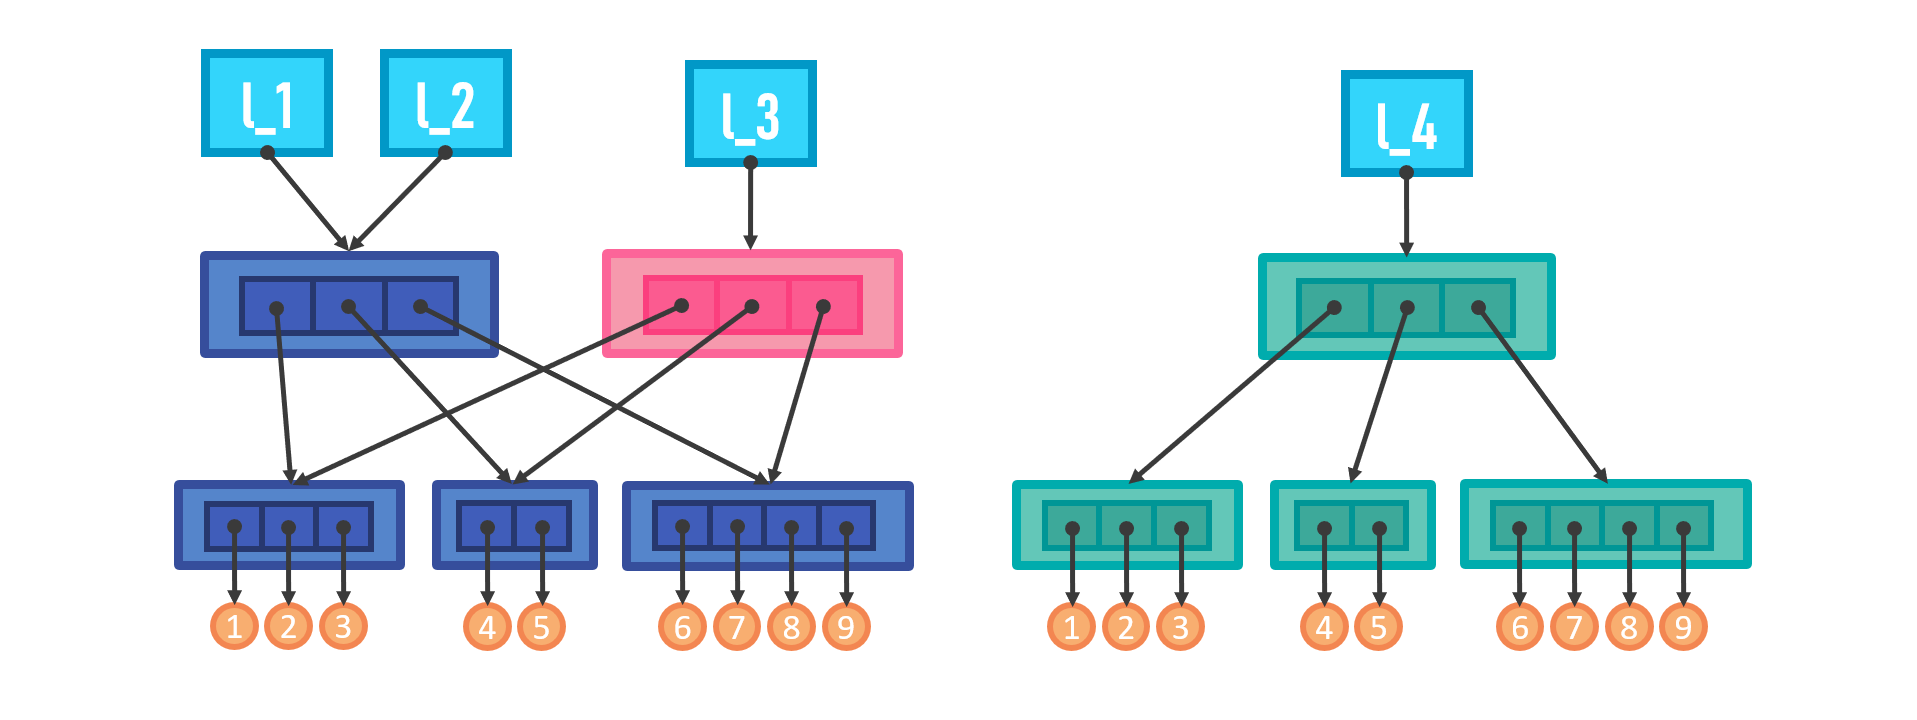

<div class="learnmore">For more detailed information about shallow and deep copy, follow the <a href="https://docs.python.org/3/library/copy.html">documentation</a>.</div>

---
<a name="defaultParameters"></a>
## [Default Function Parameters](#top)
We learned, that we can define default values for our function parameters such that when using a function, we do not always have to define each option (like the _blank_ as the value for the `sep` (seperator) parameter of the `print( )` function).
Default parameters can also be mutable objects like a `list`s. 
In the following example, we write an unnecessarily complex function to concatenate two lists (instead of using `target_list += source_list`).
The function has two parameters, `target` and `source`, both having the empty list as the default value.

In [ ]:
def enhance_list(target = [], source = []):
    for elem in source:
        target.append(elem)
    return target

When we provide values for both parameters, the function works just fine:

In [ ]:
print(enhance_list([1,2], [3,4,5]))
print(enhance_list([10,12], [14]))
print(enhance_list([9,8,7], [6,5,4]))

Now, let's see what happens if we just provide a source and use the `target`'s default value *empty list*:

In [ ]:
print(enhance_list(source=[1,2,3])) # use default list as target

Executing it the first time seems to work fine: it just returns the `source` list, because the `target` is the empty list.
Now execute this function several times.

In [ ]:
print(enhance_list(source=[1,2,3])) # use default list as target

In [ ]:
print(enhance_list(source=[4,5,6,7])) # use default list as target

This is not the intended outcome. We do not receive the `source` list concatenated to the empty target list, but the previously returned list concatenated with the `source`. 

This is caused by the interpreter executing the function definition only once.
It looks at the parameters and creates default values (if given) and points to them.
If we provide a value for a parameter when calling the function, the default value won't be used.
If we do not provide a value for a parameter when calling the function, the parameter points to its initially generated default value.
By changing the value, as we do it within the `for` loop within the function, we thus alter the referenced default list.
So with the next call, the default value has changed (aliasing effect).

In the following, we see the correct way how to solve this problem:

In [ ]:
def enhance_list(target = None, source = []):
    if target is None:
        target = []  # new empty list not referencing the default list
    for elem in source:
        target.append(elem)
    return target

Instead of providing a concrete value, we assign the default value `None` and check, if a value is provided.
If not, we assign an empty list (or any other list which makes sens as a default list).
The function body is executed every time.
Therefore, the creation of the empty list within the function is executed everytime with a "new" empty list, independent from the outcome of the last function execution.
If we execute the following code multiple times, we will receive - as expected - the same result:

In [ ]:
print(enhance_list(source=[1,2,3]))
print(enhance_list(source=[4,5,6,7]))
print(enhance_list(source=['a', 'b', 'c']))

---
# Reference Semantics: Summary
Within this lecture you have made your first experiences with memory management, called *reference semantics*, and how this affects the implementation. This includes in particular:
* Difference between assignments/copy of immutable and mutable objects  
* Aliasing: Assignment of mutable objects => two names for the same object 
* Shallow copy: `object.copy()` => Copy of the strucutre, not the elements
* Deep copy: `copy.deepcopy(object)` => Full copy of whole object


In the [next lecture](06_FunctionalProgrammingAndIterators.ipynb) you will get to know some more types of functions and how to program and use them. 